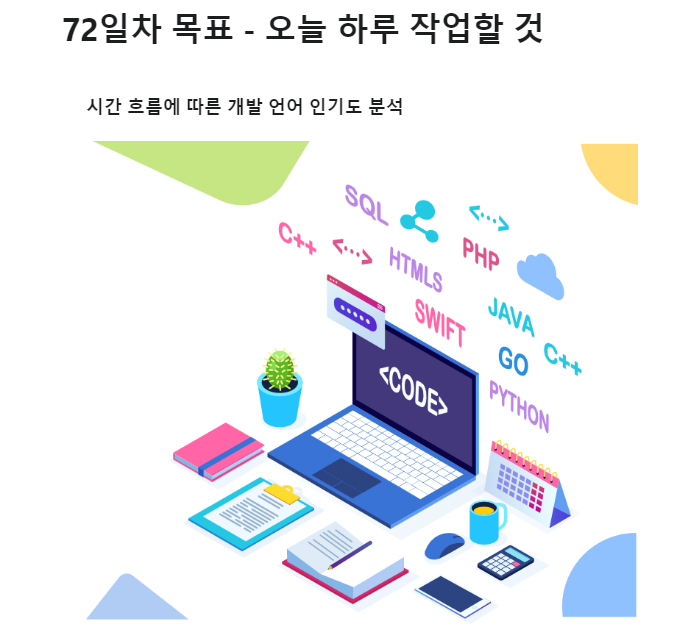

## `601강`
72일차 목표 - 오늘 하루 작업할 것

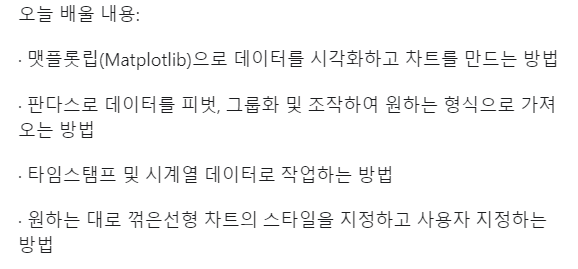

## `602강`
스타터 노트북 다운로드 및 열기
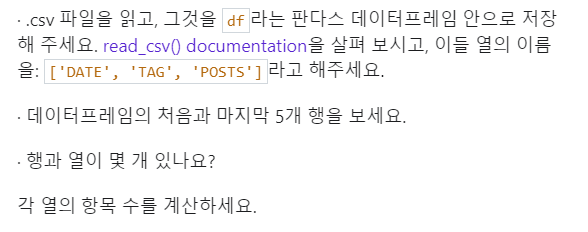

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('QueryResults.csv')
data.head(3)

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162


In [3]:
df = data.copy()

In [4]:
df.head(5)

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail(5)

,m,TagName,Unnamed: 2
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [6]:
df.shape

(1991, 3)

In [7]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [8]:
for idx, col in enumerate(df):
    print(f"Column name : {col}")
    print(df[col].value_counts())
    print(f"Column count : {len(df[col].value_counts().index)}")
    print('---------------------------------------------------')

Column name : m
2016-09-01 00:00:00    14
2013-03-01 00:00:00    14
2010-05-01 00:00:00    14
2014-03-01 00:00:00    14
2018-05-01 00:00:00    14
                       ..
2008-12-01 00:00:00    12
2008-11-01 00:00:00    12
2008-08-01 00:00:00    11
2008-10-01 00:00:00    11
2008-07-01 00:00:00     1
Name: m, Length: 145, dtype: int64
Column count : 145
---------------------------------------------------
Column name : TagName
c#            145
c             144
c++           144
perl          144
assembly      144
ruby          144
php           144
java          144
javascript    144
python        144
delphi        144
r             142
swift         135
go            129
Name: TagName, dtype: int64
Column count : 14
---------------------------------------------------
Column name : Unnamed: 2
1        15
2        12
3        11
4         7
6         7
         ..
4553      1
10702     1
465       1
469       1
13115     1
Name: Unnamed: 2, Length: 1645, dtype: int64
Column count : 164

## `603강`
해설: 예비 데이터 탐색

In [9]:
df = pd.read_csv('QueryResults.csv', names=['DATE','TAG','POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


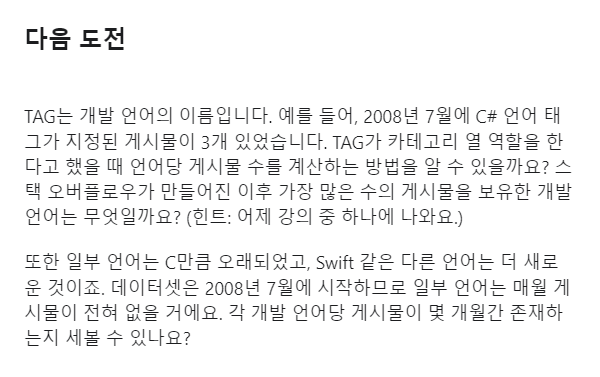

## `604강`
해설: 개발 언어 분석

- 가장 많은 수의 게시물 보유 개발 언어

In [10]:
df.groupby('TAG').sum()['POSTS'].sort_values(ascending=False)

TAG
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: POSTS, dtype: int64

In [11]:
df.groupby('TAG').sum()['POSTS'].sort_values(ascending=False).head(1)

TAG
javascript    2056510
Name: POSTS, dtype: int64

- 각 개발언어당 게시물이 몇 개월간 존재하는지 ?

In [12]:
df.groupby('TAG').count()['DATE'].sort_values(ascending=False)

TAG
c#            145
ruby          144
python        144
php           144
perl          144
javascript    144
java          144
delphi        144
c++           144
c             144
assembly      144
r             142
swift         135
go            129
Name: DATE, dtype: int64

## `605강`
데이터 정리: 타임스탬프 작업

In [13]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [14]:
df.DATE[1]

'2008-08-01 00:00:00'

In [15]:
type(df.DATE[1])

str

In [16]:
print(pd.to_datetime(df.DATE[1]))
print(type(pd.to_datetime(df.DATE[1])))

2008-08-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head(3)

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162


## `606강`
데이터 조작: 데이터프레임 피벗하기

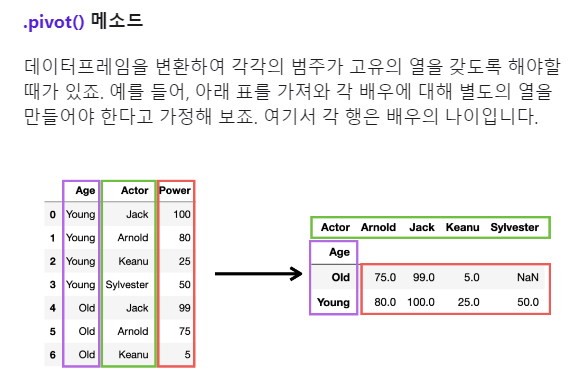

In [18]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})

test_df.head(3)

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25


In [19]:
pivot_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivot_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


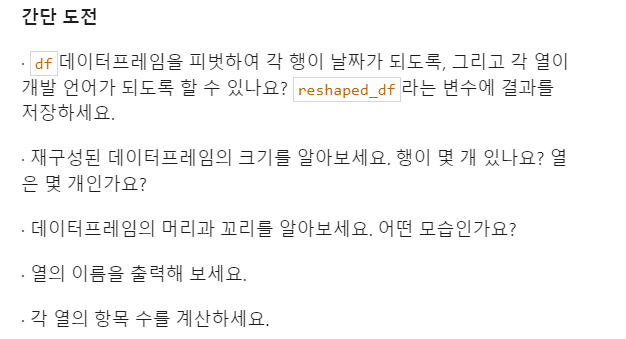

In [20]:
reshape_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshape_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [21]:
reshape_df.shape

(145, 14)

In [22]:
reshape_df.fillna(0, inplace=True)

In [23]:
reshape_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [24]:
reshape_df.tail(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [25]:
reshape_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='DATE', length=145, freq=None)

In [26]:
reshape_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [27]:
reshape_df.isna().values.any()

False

## `607강`
맷플롯립으로 데이터 시각화
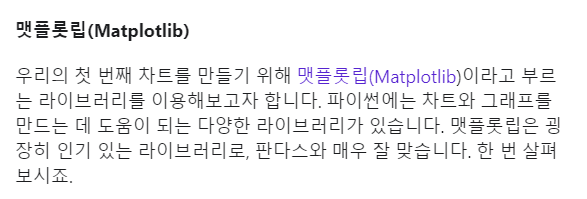

In [28]:
import matplotlib.pyplot as plt

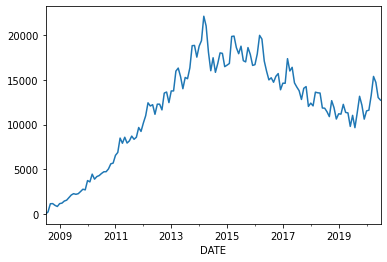

In [29]:
reshape_df['java'].plot();

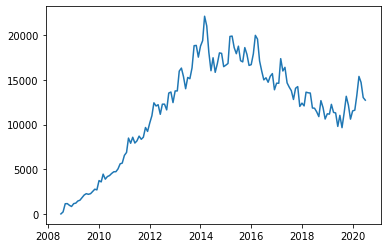

In [30]:
plt.plot(reshape_df.index, reshape_df['java']);

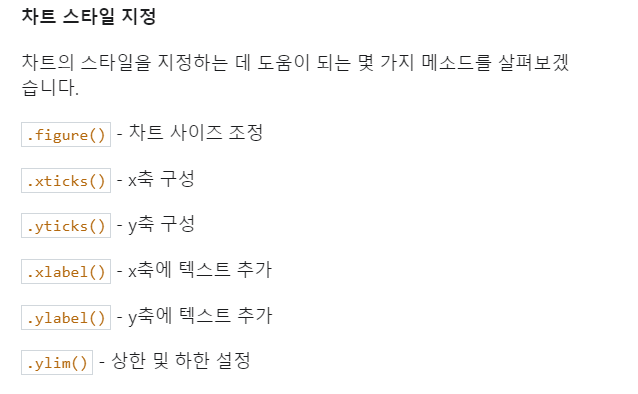

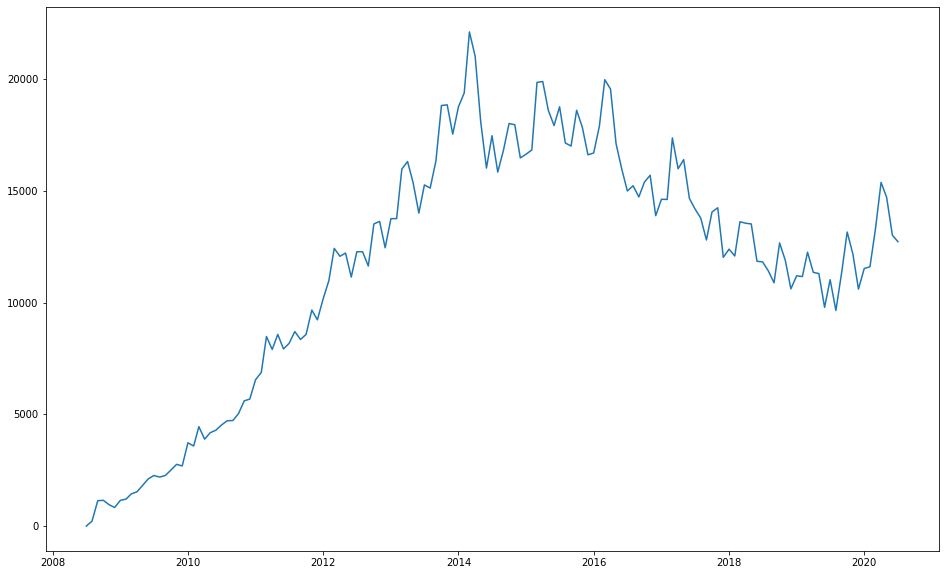

In [31]:
plt.figure(figsize=(16,10))
plt.plot(reshape_df.index, reshape_df['java']);

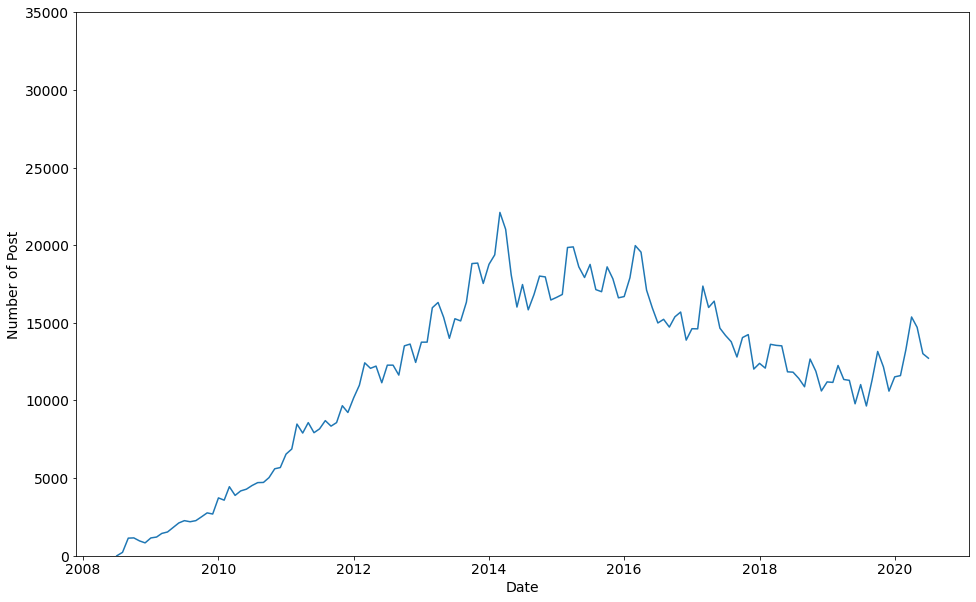

In [32]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Post', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape_df.index, reshape_df['java']);

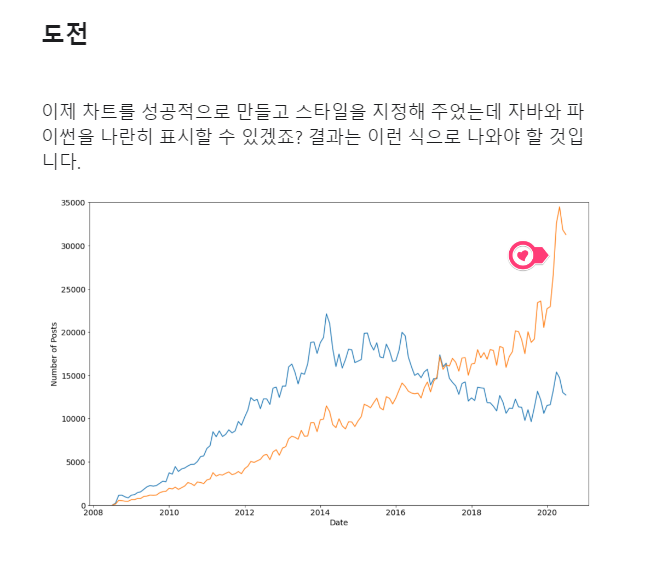

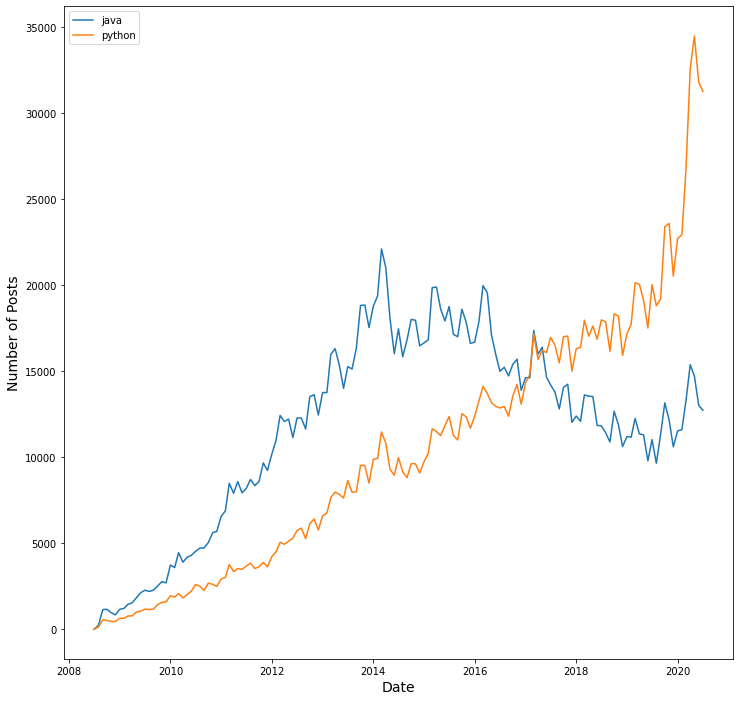

In [33]:
plt.figure(figsize=(12,12))
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.plot(reshape_df.index, reshape_df['java'], label='java')
plt.plot(reshape_df.index, reshape_df['python'], label='python')
plt.legend();

## `608강`
맷플롯립을 이용한 다중 선형 차트

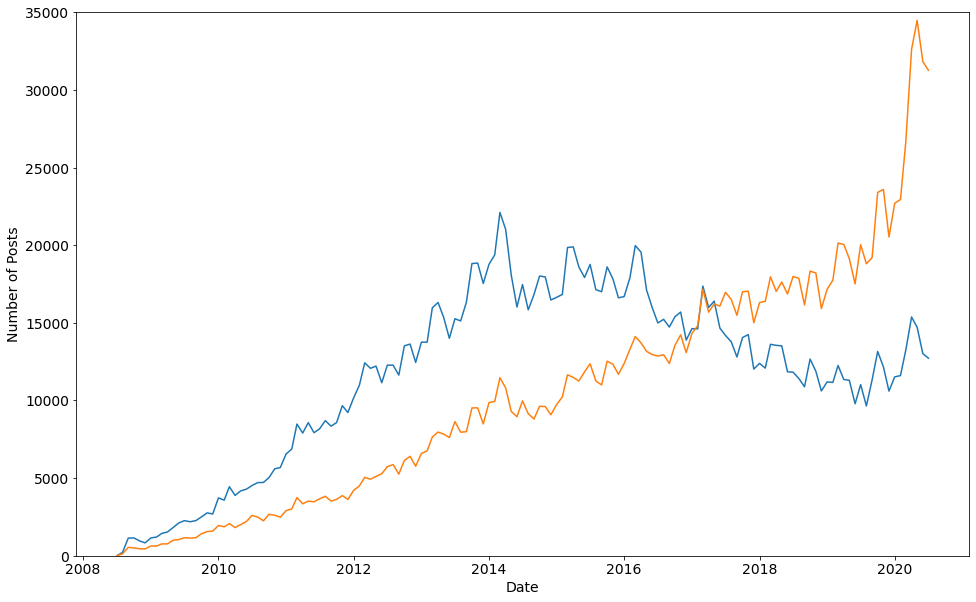

In [34]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
plt.plot(reshape_df.index, reshape_df.java)
plt.plot(reshape_df.index, reshape_df.python) # Tadah!

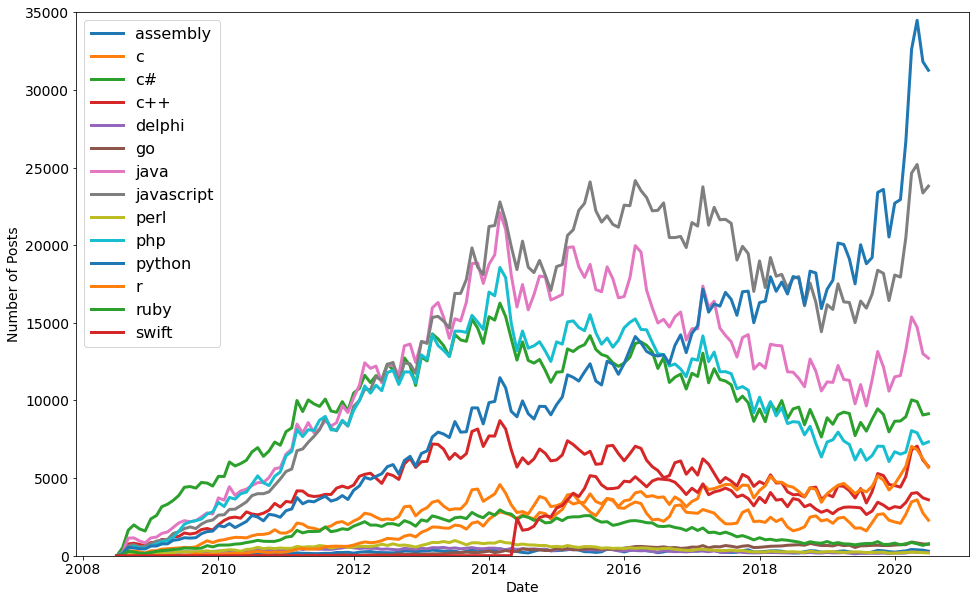

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshape_df.columns:
    plt.plot(reshape_df.index, reshape_df[column], linewidth=3, label=reshape_df[column].name)

plt.legend(fontsize=16);

## `609강`
시계열 데이터 다듬기

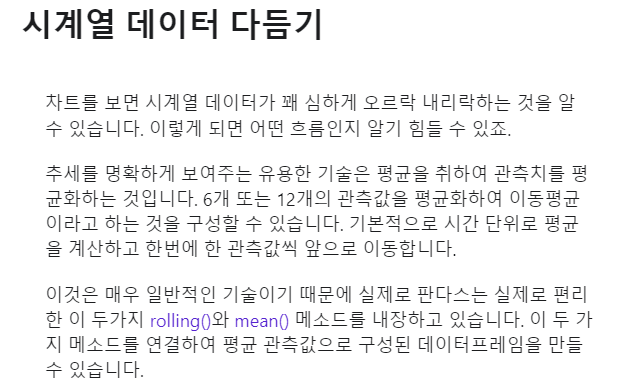

In [36]:
roll_df = reshape_df.rolling(window=6).mean()
roll_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667


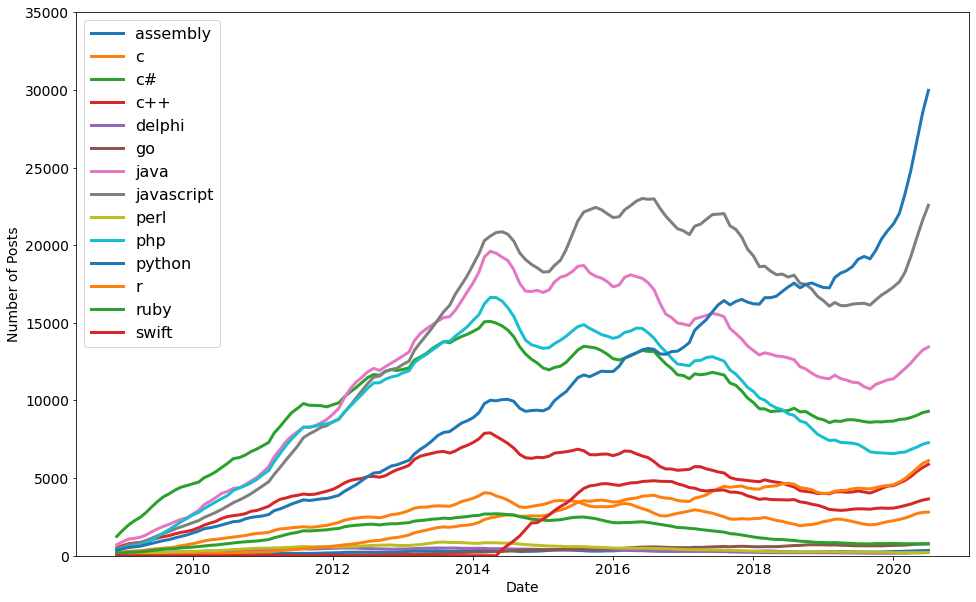

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16);

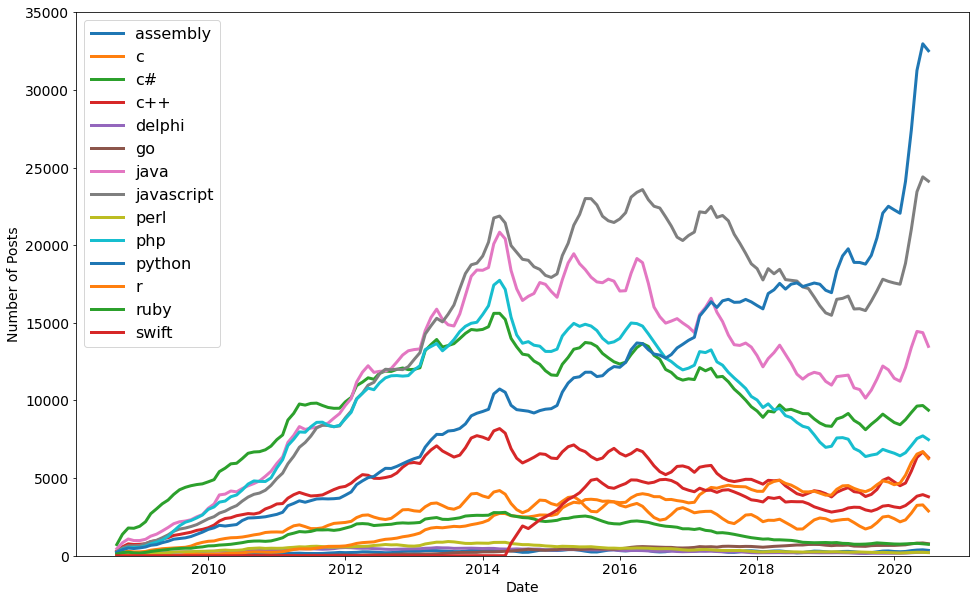

In [38]:
roll_df = reshape_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16);

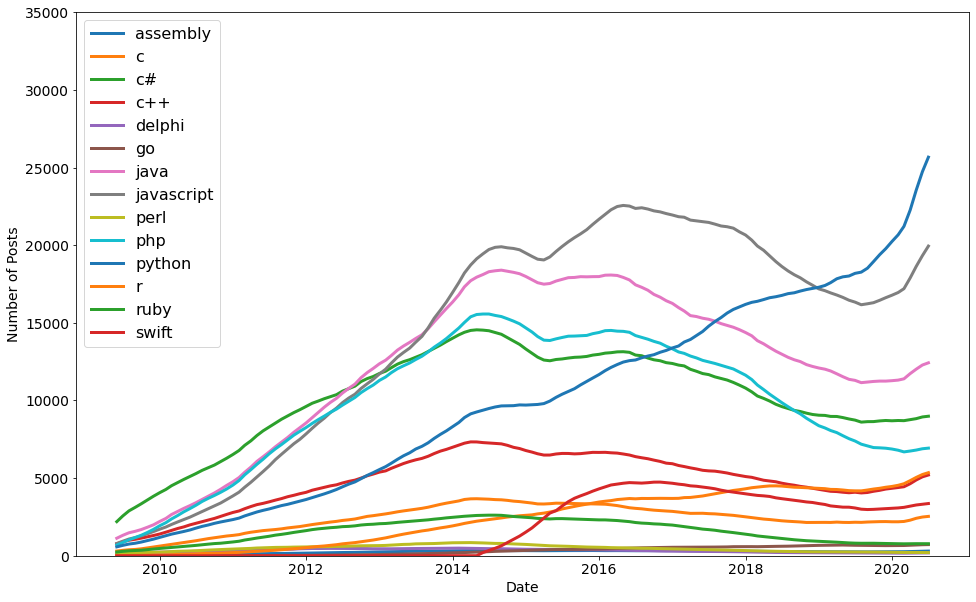

In [39]:
roll_df = reshape_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    
plt.legend(fontsize=16);

## `699`
퀴즈 18: 프로그래밍 언어 데이터 분석

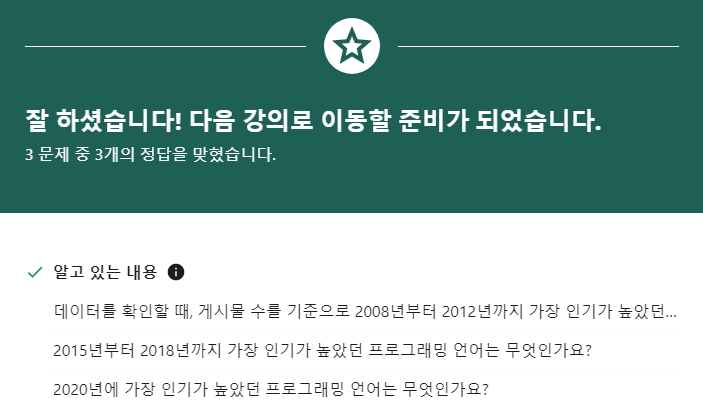

## `610`
핵심 학습내용 및 요약

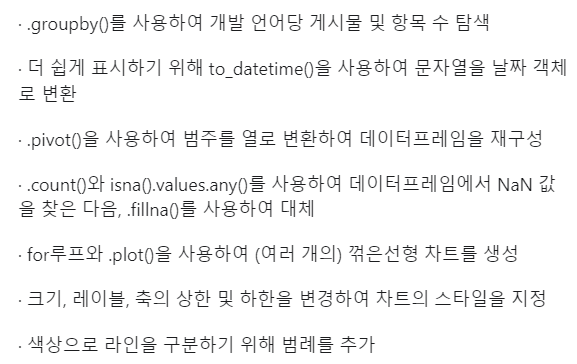
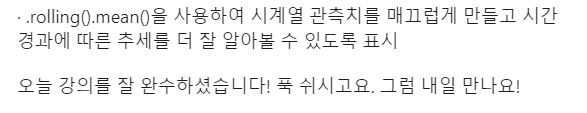